In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\Weather\weather_classification_data.csv")

In [3]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [4]:
df.shape

(13200, 11)

In [5]:
df.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.value_counts('Cloud Cover')

Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64

In [8]:
df.value_counts('Season')

Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64

In [9]:
df.value_counts('Location')

Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64

In [10]:
df.value_counts('Weather Type')

Weather Type
Cloudy    3300
Rainy     3300
Snowy     3300
Sunny     3300
Name: count, dtype: int64

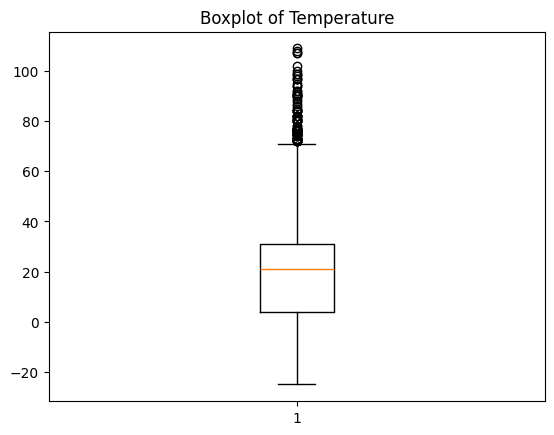

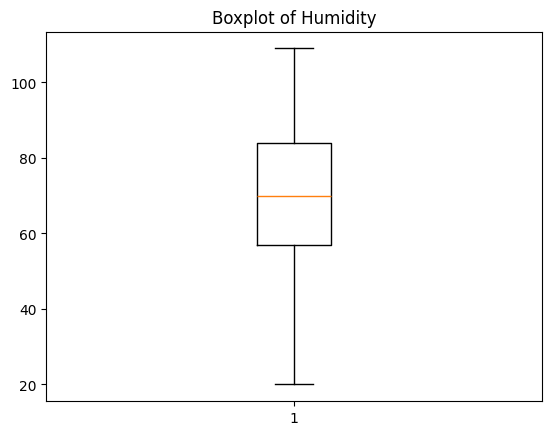

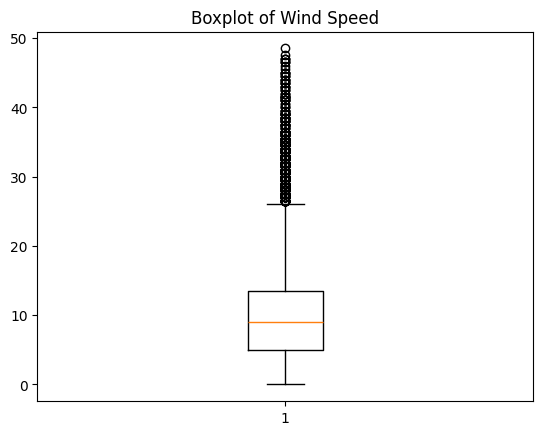

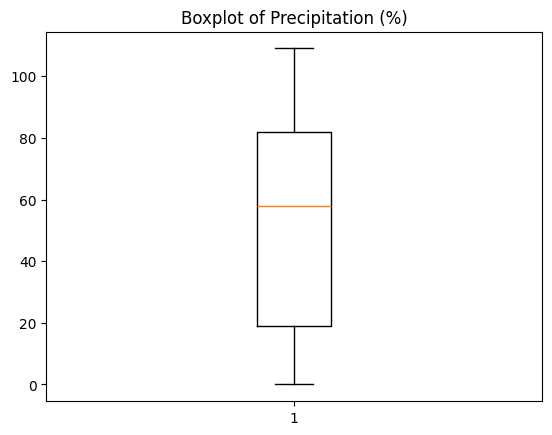

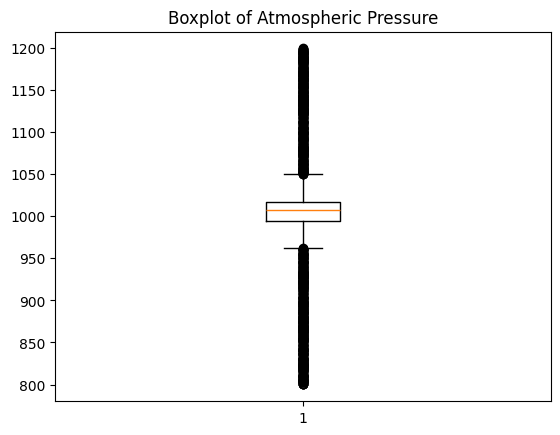

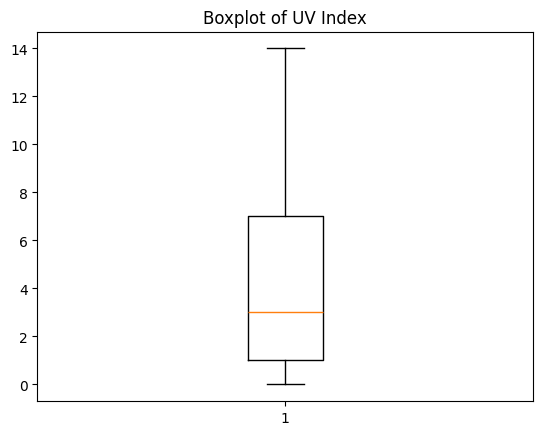

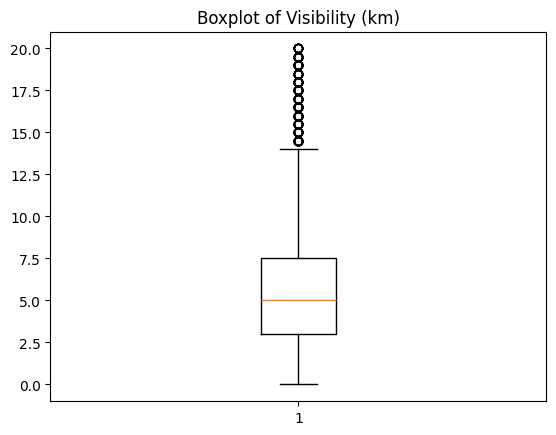

In [11]:
for col in df:
    if df[col].dtype=="int" or df[col].dtype=="float":
        plt.boxplot(df[col])
        plt.title(f"Boxplot of {col}")
        plt.show()


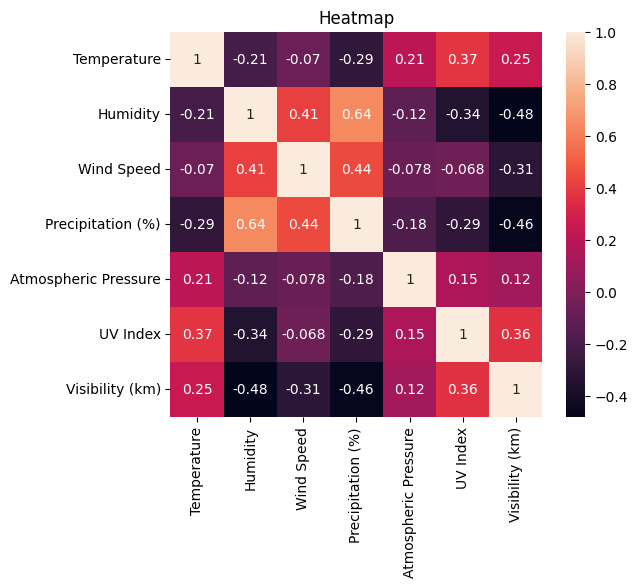

In [12]:
import seaborn as sns
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title("Heatmap")
plt.show()

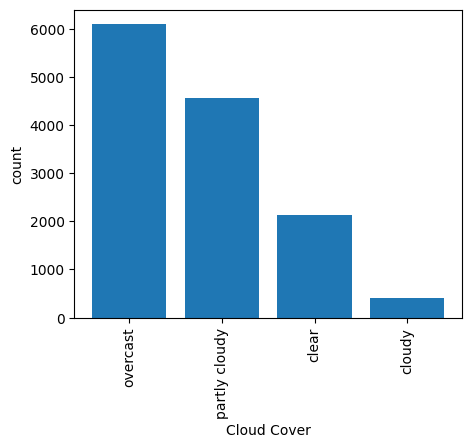

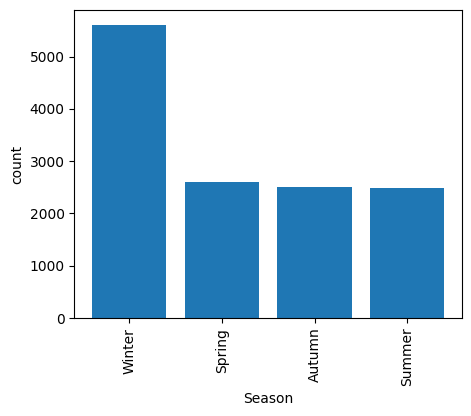

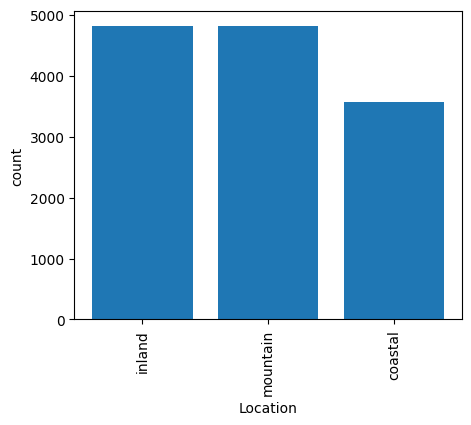

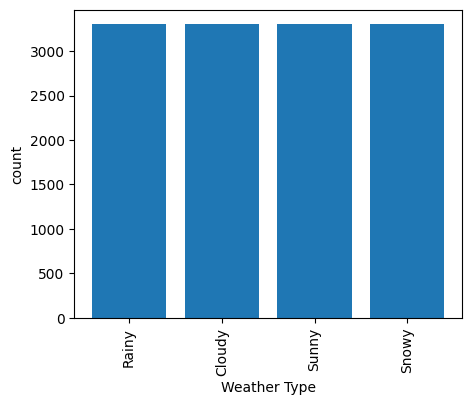

In [13]:
for i in df:
  if df[i].dtype=="object" and df[i].nunique()<=35:
    plt.figure(figsize=(5,4))
    plt.bar(x=df[i].value_counts().index,height=df[i].value_counts())
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()

In [14]:
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder(drop="first",sparse_output=False)
res=one.fit_transform(df[["Season","Location"]])

In [15]:
# df['Location'].n

In [16]:
dataframe=pd.DataFrame(res,columns=one.get_feature_names_out())

In [17]:
df=df.join(dataframe)

In [18]:
df.drop(['Season','Location'],axis=1,inplace=True)
df.reset_index(drop=True,inplace=True)

In [19]:
from sklearn.preprocessing import OrdinalEncoder

In [20]:
ord=OrdinalEncoder(categories=[['clear', 'partly cloudy', 'cloudy', 'overcast']])
df['Cloud Cover']=ord.fit_transform(df[['Cloud Cover']])

In [21]:
ord.inverse_transform([[0]])

array([['clear']], dtype=object)

In [22]:
df['Weather Type']=df['Weather Type'].map({'Snowy':0,'Rainy':1,'Cloudy':2,'Sunny':3})

In [23]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Visibility (km),Weather Type,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain
0,14.0,73,9.5,82.0,1.0,1010.82,2,3.5,1,0.0,0.0,1.0,1.0,0.0
1,39.0,96,8.5,71.0,1.0,1011.43,7,10.0,2,1.0,0.0,0.0,1.0,0.0
2,30.0,64,7.0,16.0,0.0,1018.72,5,5.5,3,1.0,0.0,0.0,0.0,1.0
3,38.0,83,1.5,82.0,0.0,1026.25,7,1.0,3,1.0,0.0,0.0,0.0,0.0
4,27.0,74,17.0,66.0,3.0,990.67,1,2.5,1,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,3.0,1003.15,1,1.0,1,0.0,1.0,0.0,0.0,1.0
13196,-1.0,76,3.5,23.0,2.0,1067.23,1,6.0,0,0.0,0.0,1.0,0.0,0.0
13197,30.0,77,5.5,28.0,3.0,1012.69,3,9.0,2,0.0,0.0,0.0,0.0,0.0
13198,3.0,76,10.0,94.0,3.0,984.27,0,2.0,0,0.0,0.0,1.0,1.0,0.0


In [24]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)',
       'Weather Type', 'Season_Spring', 'Season_Summer', 'Season_Winter',
       'Location_inland', 'Location_mountain'],
      dtype='object')

In [25]:
min(df['Temperature'])

-25.0

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  float64
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Visibility (km)       13200 non-null  float64
 8   Weather Type          13200 non-null  int64  
 9   Season_Spring         13200 non-null  float64
 10  Season_Summer         13200 non-null  float64
 11  Season_Winter         13200 non-null  float64
 12  Location_inland       13200 non-null  float64
 13  Location_mountain     13200 non-null  float64
dtypes: float64(11), int64(3)
memory usage: 1.4 MB


In [27]:
x=df.drop(columns=['Weather Type'])
y=df['Weather Type']

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [29]:
from imblearn.over_sampling import SMOTE
sampler=SMOTE()
x,y=sampler.fit_resample(x,y)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
models=[DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),GaussianNB()]
for model in models:
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(model)
  print("_____________________________________________________________")
  print(f"Accuracy:{accuracy_score(y_test,y_pred)}")
  print(classification_report(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  print("_____________________________________________________________")
  from sklearn.model_selection import cross_val_score
  print(f"Cross Validation Score:{cross_val_score(model,x,y,cv=5).mean()}")
  print("_____________________________________________________________")

DecisionTreeClassifier()
_____________________________________________________________
Accuracy:0.9037878787878788
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1033
           1       0.89      0.89      0.89       982
           2       0.88      0.89      0.88       955
           3       0.92      0.90      0.91       990

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960

[[963  26  21  23]
 [ 23 876  57  26]
 [ 23  53 847  32]
 [ 25  33  39 893]]
_____________________________________________________________
Cross Validation Score:0.9065151515151516
_____________________________________________________________
KNeighborsClassifier()
_____________________________________________________________
Accuracy:0.8863636363636364
              precision    recall  f1-score   support

           0       0.89      0.95      

In [31]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
dict1={"criterion":['entropy','gini'],'max_depth':range(10,151,5)}
tuner=GridSearchCV(DecisionTreeClassifier(),dict1,cv=5)
tuner.fit(x,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(10, 151, 5)})

In [32]:
cv_models=[DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),GaussianNB()]
for model in models:
  from sklearn.model_selection import cross_val_score
  print(f"Cross Validation Score:{cross_val_score(model,x,y,cv=5).mean()}")
  print("_____________________________________________________________")

Cross Validation Score:0.906287878787879
_____________________________________________________________
Cross Validation Score:0.8875
_____________________________________________________________
Cross Validation Score:0.8270454545454546
_____________________________________________________________
Cross Validation Score:0.8350757575757577
_____________________________________________________________


In [33]:
final_model = DecisionTreeClassifier(criterion='entropy', max_depth=10)
final_model.fit(x_train, y_train)
y_pred_DecisionTreeClassifier = model.predict(x_test)

print(final_model)
print("_")
print(f"Accuracy: {accuracy_score(y_test, y_pred_DecisionTreeClassifier)}")
print(classification_report(y_test, y_pred_DecisionTreeClassifier))
print(confusion_matrix(y_test, y_pred_DecisionTreeClassifier))
from sklearn.model_selection import cross_val_score
print(f"Cross Validation Score:{cross_val_score(final_model,x,y,cv=5).mean()}")
print("_")

DecisionTreeClassifier(criterion='entropy', max_depth=10)
_
Accuracy: 0.8373737373737373
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1033
           1       0.79      0.76      0.77       982
           2       0.87      0.79      0.83       955
           3       0.89      0.87      0.88       990

    accuracy                           0.84      3960
   macro avg       0.84      0.84      0.84      3960
weighted avg       0.84      0.84      0.84      3960

[[962  14  24  33]
 [163 743  51  25]
 [ 39 113 753  50]
 [ 20  72  40 858]]
Cross Validation Score:0.9107575757575758
_


In [34]:
dict1={'model':final_model,'one_hot':one}

In [35]:
import pickle
with open('main.pkl','wb') as obj1:
  pickle.dump(dict1,obj1)